# 3. 분류

# 3.1 MNIST

In [2]:
import numpy as np

In [3]:
def sort_by_target(mnist): 
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1] 
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1] 
    mnist.data[:60000] = mnist.data[reorder_train] 
    mnist.target[:60000] = mnist.target[reorder_train] 
    mnist.data[60000:] = mnist.data[reorder_test + 60000] 
    mnist.target[60000:] = mnist.target[reorder_test + 60000] 

try: 
    from sklearn.datasets import fetch_openml 
    mnist = fetch_openml('mnist_784', version=1, cache=True) 
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings 
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset 
except ImportError: 
    from sklearn.datasets import fetch_mldata 
    mnist = fetch_mldata('MNIST original')

In [4]:
from sklearn.datasets import fetch_openml

In [5]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X,y=mnist["data"],mnist["target"]

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
y = y.astype(np.int8)

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
some_digit =X[0]
some_digit_image=some_digit.reshape(28,28)

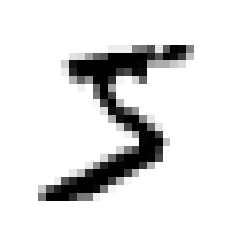

In [13]:
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [14]:
y[0]

5

In [15]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [16]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int8)

# 3.2 이진 분류기 훈련

In [18]:
y_train_5 = (y_train == 5)

In [19]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [20]:
y_test_5 = (y_test == 5)

In [21]:
y_test_5

array([False, False, False, ..., False,  True, False])

In [22]:
from sklearn.linear_model import SGDClassifier

In [23]:
sgd_clf = SGDClassifier(random_state=42)

In [24]:
from sklearn.linear_model import SGDClassifier 
sgd_clf = SGDClassifier(max_iter=5, random_state=42) 
sgd_clf.fit(X_train, y_train_5)

C:\Users\ann34\anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=5, random_state=42)

In [25]:
sgd_clf.predict([some_digit])

array([ True])

에러 : https://somjang.tistory.com/entry/%ED%95%B8%EC%A6%88%EC%98%A8%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-127%ED%8E%98%EC%9D%B4%EC%A7%80-MNIST-%EC%BD%94%EB%93%9C-ValueError-The-number-of-classes-has-to-be-greater-than-one-got-1-class-%ED%95%B4%EA%B2%B0%EB%B0%A9%EB%B2%95

# 3.3 성능 측정

## 3.3.1 교차 검증을 사용한 정확도 측정

In [1]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [27]:
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle= True)

for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

C:\Users\ann34\anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.96775


C:\Users\ann34\anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.95415
0.9633


C:\Users\ann34\anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [28]:
from sklearn.model_selection import cross_val_score

In [30]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

C:\Users\ann34\anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\ann34\anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\ann34\anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.9633 , 0.95695, 0.9146 ])

In [31]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [32]:
never_5_clf = Never5Classifier()

In [33]:
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

## 3.3.2 오차 행렬

In [34]:
from sklearn.model_selection import cross_val_predict

In [35]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=5)

C:\Users\ann34\anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\ann34\anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\ann34\anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\ann34\anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarn

In [36]:
from sklearn.model_selection import cross_val_predict

In [37]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

C:\Users\ann34\anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\ann34\anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\ann34\anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_train_5,y_train_pred)

array([[52336,  2243],
       [ 1060,  4361]], dtype=int64)

In [40]:
y_train_perfect_predictions = y_train_5

In [41]:
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## 3.3.3 정밀도와 재현율

In [45]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train_5,y_train_pred)

0.6603573591762568

In [44]:
recall_score(y_train_5,y_train_pred)

0.8044641210108836

In [46]:
from sklearn.metrics import f1_score

In [47]:
f1_score(y_train_5,y_train_pred)

0.7253222453222454

## 정밀도/재현율 트레이드오프

In [48]:
y_scores = sgd_clf.decision_function([some_digit])

In [49]:
y_scores

array([57392.7316778])

In [50]:
threshold =0

In [52]:
y_some_digit_pred

NameError: name 'y_some_digit_pred' is not defined